In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import export_graphviz  # generate decision tree graphs
from graphviz import Source  # read the graph file


In [2]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width columns
y = iris.target  # class 0, 1, 2

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

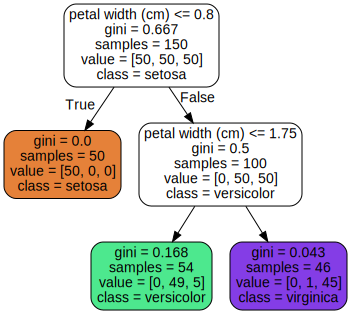

In [3]:
export_graphviz(tree_clf, 
                out_file="iris_tree.gv", 
                feature_names=iris.feature_names[2:],  # petal length and width
                class_names=iris.target_names,  # 'setosa', 'versicolor', 'virginica'
                rounded=True, filled=True)
Source.from_file('iris_tree.gv')

In [4]:
len(y)

150

In [5]:
tree_clf.predict_proba([[5, 1.5]])  # probabilities for class 0, 1, 2

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

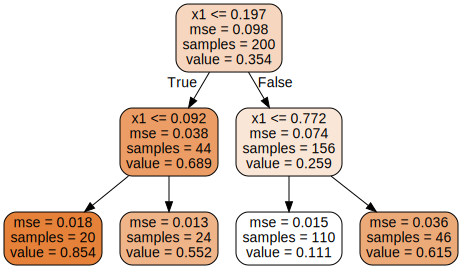

In [11]:
# Qudratic data + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

# Regression using tree
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

export_graphviz(tree_reg, 
                out_file="regression_tree.gv", 
                feature_names=['x1'],  
                rounded=True, filled=True)
Source.from_file('regression_tree.gv')

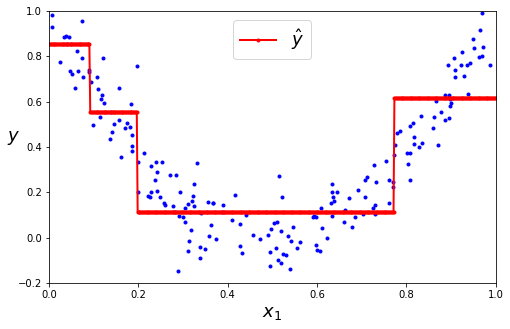

In [25]:
# above is a very rough regression fit by decision tree:
axes = [0, 1, -0.2, 1]
x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
y_pred = tree_reg.predict(x1)

plt.figure(figsize=(8, 5))
plt.axis(axes)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.legend(loc='upper center', fontsize=18);

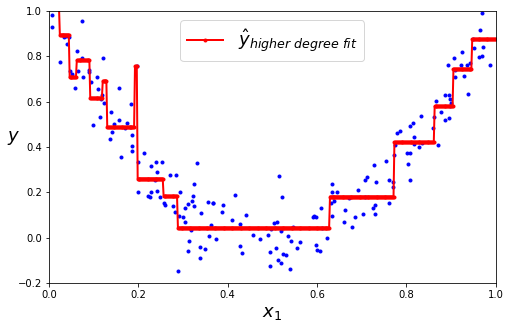

In [24]:
# fit a finer decision tree
tree_reg_higherdegreefit = DecisionTreeRegressor(max_depth=4)
tree_reg_higherdegreefit.fit(X, y)

y_pred_2 = tree_reg_higherdegreefit.predict(x1)
plt.figure(figsize=(8, 5))
plt.axis(axes)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred_2, "r.-", linewidth=2, label=r"$\hat{y}_{higher\ degree\ fit}$")
plt.legend(fontsize=18);